<a href="https://colab.research.google.com/github/keshavvprabhu/python-tutorials/blob/main/ApplicationRiskScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [106]:
# Set seed for reproducibility
np.random.seed(123)

In [107]:
# Define the number of applications and reporting periods
num_apps = 25
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
num_periods = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) + 1
print(num_periods)

12


In [108]:
# Create a list of CSI IDs and application names
csi_ids = list(range(1, num_apps + 1))
app_names = ['App{}'.format(i) for i in range(1, num_apps + 1)]

In [109]:
# Create a list of reporting periods
reporting_periods = [datetime.strftime(start_date + relativedelta(months=i), '%Y-%m') for i in range(num_periods)]
reporting_periods

['2022-01',
 '2022-02',
 '2022-03',
 '2022-04',
 '2022-05',
 '2022-06',
 '2022-07',
 '2022-08',
 '2022-09',
 '2022-10',
 '2022-11',
 '2022-12']

In [110]:
# Generate random inherent and residual risk scores for each application and reporting period
inherent_risk_scores = np.round(np.random.uniform(low=0.00, high=5.00, size=(num_apps, num_periods)), decimals=2)
residual_risk_scores = np.round(np.random.uniform(low=0.00, high=5.00, size=(num_apps, num_periods)), decimals=2)


In [111]:
# Create a DataFrame with the data
data = []
for i in range(num_apps):
    for j in range(num_periods):
        inherent_tier = 'Tier{}'.format(int(np.ceil(inherent_risk_scores[i,j])))
        residual_tier = 'Tier{}'.format(int(np.ceil(residual_risk_scores[i,j])))
        data.append([csi_ids[i], app_names[i], reporting_periods[j], inherent_risk_scores[i,j], residual_risk_scores[i,j], inherent_tier, residual_tier])
df = pd.DataFrame(data, columns=['CSI_ID', 'Application_Name', 'Reporting_Period', 'Inherent_Risk_Score', 'Residual_Risk_Score', 'Inherent_Tier', 'Residual_Tier'])

In [112]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
# Create a pivot table to summarize the data by reporting period and inherent tier
inherent_risk_pivot = pd.pivot_table(df, values='Inherent_Risk_Score', index=['Reporting_Period'], columns=['CSI_ID'], aggfunc='first').T
residual_risk_pivot = pd.pivot_table(df, values='Residual_Risk_Score', index=['Reporting_Period'], columns=['CSI_ID'], aggfunc='first').T

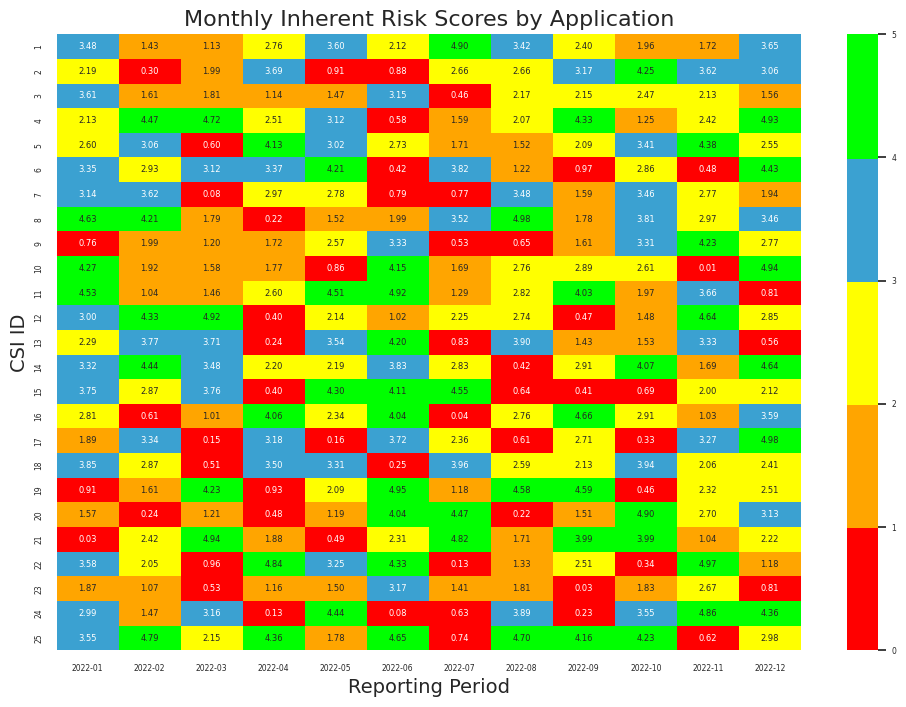

In [113]:
# Define a custom color map
colors = ['#FF0000', '#FFA500', '#FFFF00', '#3ba1d1', '#00FF00']
cmap = ListedColormap(colors)

# Create a heatmap of the pivot table using the custom color map
sns.set(font_scale=0.5)
plt.figure(figsize=(12, 8))
sns.heatmap(inherent_risk_pivot, cmap=cmap, annot=True, fmt='.2f', cbar=True, vmin=0, vmax=5, center=2.5)
plt.title('Monthly Inherent Risk Scores by Application', fontsize=16)
plt.xlabel('Reporting Period', fontsize=14)
plt.ylabel('CSI ID', fontsize=14)
plt.show()

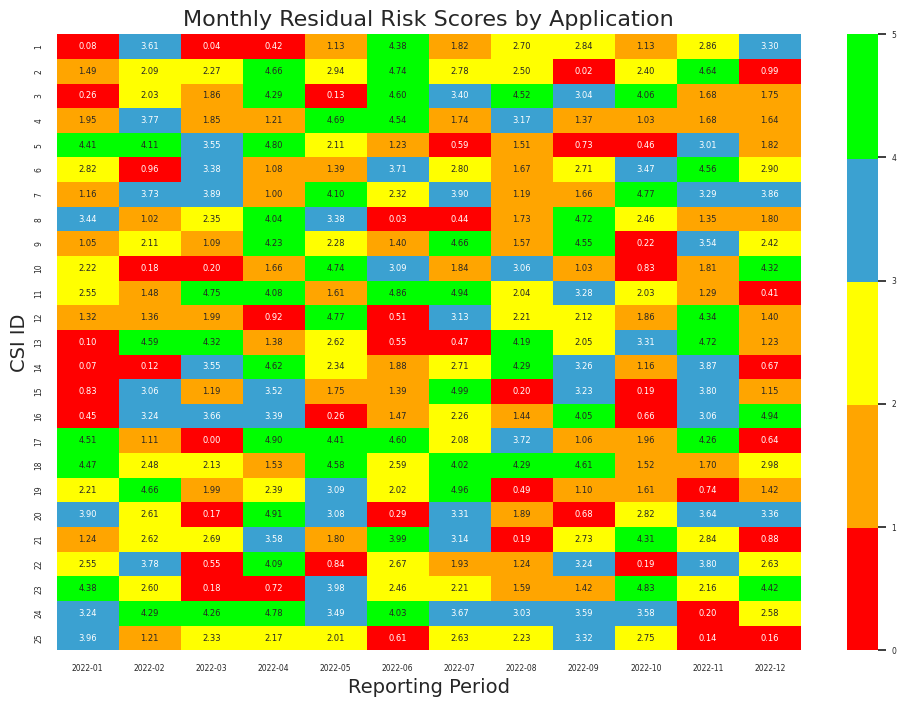

In [114]:
# Define a custom color map
colors = ['#FF0000', '#FFA500', '#FFFF00', '#3ba1d1', '#00FF00']
cmap = ListedColormap(colors)

# Create a heatmap of the pivot table using the custom color map
sns.set(font_scale=0.5)
plt.figure(figsize=(12, 8))
sns.heatmap(residual_risk_pivot, cmap=cmap, annot=True, fmt='.2f', cbar=True, vmin=0, vmax=5, center=2.5)
plt.title('Monthly Residual Risk Scores by Application', fontsize=16)
plt.xlabel('Reporting Period', fontsize=14)
plt.ylabel('CSI ID', fontsize=14)
plt.show()

In [130]:
import plotly.express as px

# Define a custom color map
colors = ['#FF0000', '#FFA500', '#FFFF00', '#3ba1d1', '#00FF00']
# Define a custom color map
colors = ['#FF0000', '#FFA500', '#FFFF00', '#3ba1d1', '#00FF00']

# Create a heatmap of the pivot table using plotly express
fig = px.imshow(inherent_risk_pivot, color_continuous_scale=colors, zmin=0, zmax=5, color_continuous_midpoint=2.5)
fig.update_layout(title='Monthly Residual Risk Scores by Application', xaxis_title='Reporting Period', yaxis_title='CSI ID')
fig.update_traces(showscale=True, colorbar=dict(title='Residual Risk Scores', 
                                           nticks=6,
                                           tickvals=[0, 1, 2, 3, 4, 5],
                                           ticktext=['0 (Tier 5)', '1 (Tier 4)', '2 (Tier 3)', '3 (Tier 2)', '4 (Tier 1)', '5 (No Data)']))
fig.show()